In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv', index_col='car_ID')
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 17  bo

In [4]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.describe(include = object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [7]:
df.nunique()

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [8]:
import seaborn as sns
sns.set_theme()
sns.set_style("dark")

<Axes: xlabel='price', ylabel='Count'>

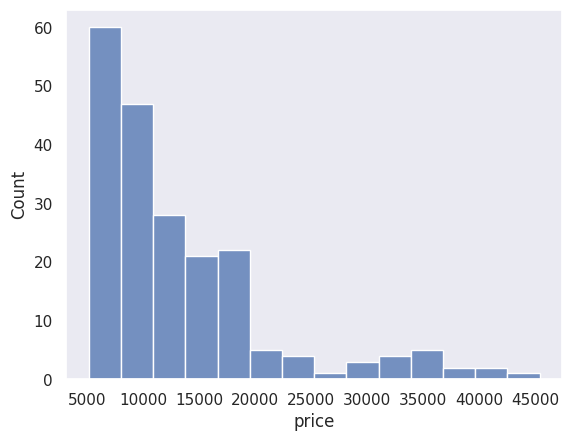

In [9]:
sns.histplot(x=df.price)

<Axes: xlabel='symboling', ylabel='price'>

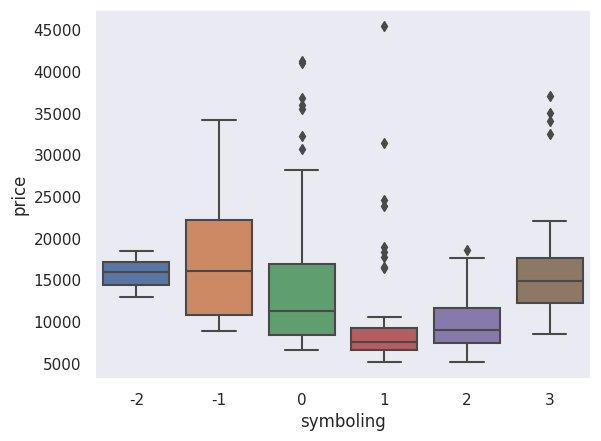

In [10]:
sns.boxplot(df, x='symboling', y = df.price)

<Axes: xlabel='symboling', ylabel='count'>

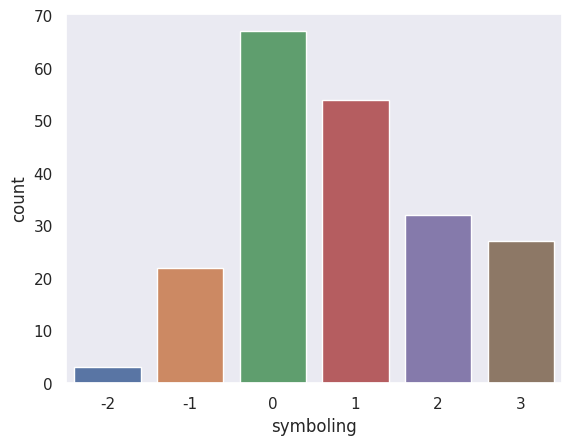

In [11]:
sns.countplot(x=df.symboling)

In [12]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:

df.CarName = df.CarName.apply(lambda x: x.split(' ')[0].lower())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'alfa-romero'),
  Text(1, 0, 'audi'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'chevrolet'),
  Text(4, 0, 'dodge'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'isuzu'),
  Text(7, 0, 'jaguar'),
  Text(8, 0, 'maxda'),
  Text(9, 0, 'mazda'),
  Text(10, 0, 'buick'),
  Text(11, 0, 'mercury'),
  Text(12, 0, 'mitsubishi'),
  Text(13, 0, 'nissan'),
  Text(14, 0, 'peugeot'),
  Text(15, 0, 'plymouth'),
  Text(16, 0, 'porsche'),
  Text(17, 0, 'porcshce'),
  Text(18, 0, 'renault'),
  Text(19, 0, 'saab'),
  Text(20, 0, 'subaru'),
  Text(21, 0, 'toyota'),
  Text(22, 0, 'toyouta'),
  Text(23, 0, 'vokswagen'),
  Text(24, 0, 'volkswagen'),
  Text(25, 0, 'vw'),
  Text(26, 0, 'volvo')])

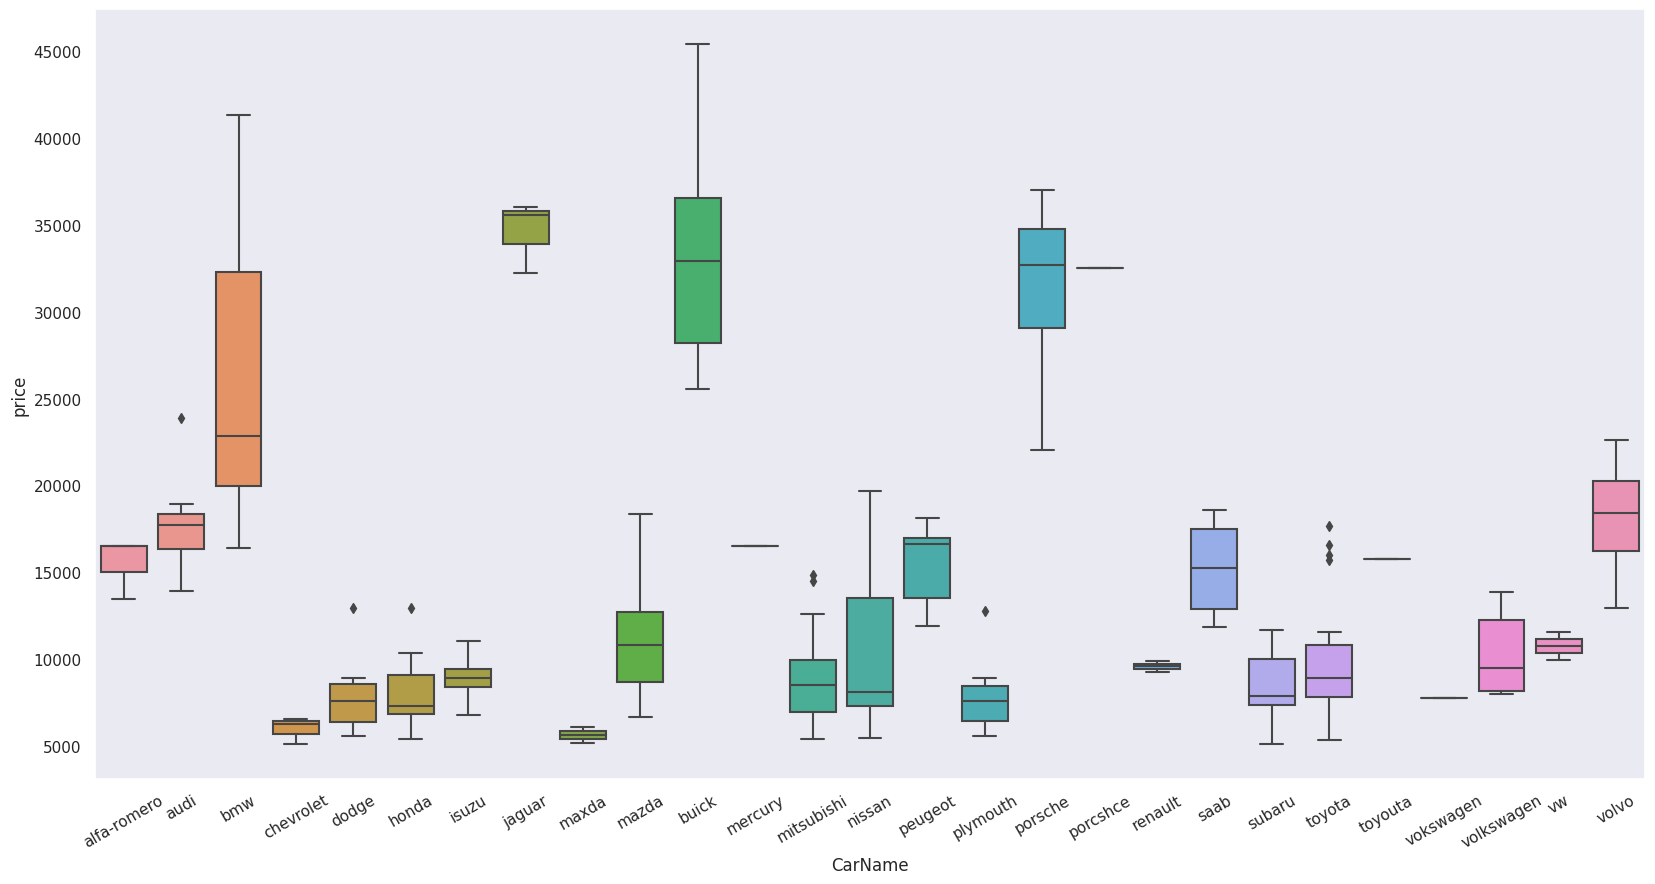

In [14]:
plt.figure(figsize = (20,10))
sns.boxplot(df, x='CarName',y= 'price')
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'alfa-romero'),
  Text(1, 0, 'audi'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'chevrolet'),
  Text(4, 0, 'dodge'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'isuzu'),
  Text(7, 0, 'jaguar'),
  Text(8, 0, 'maxda'),
  Text(9, 0, 'mazda'),
  Text(10, 0, 'buick'),
  Text(11, 0, 'mercury'),
  Text(12, 0, 'mitsubishi'),
  Text(13, 0, 'nissan'),
  Text(14, 0, 'peugeot'),
  Text(15, 0, 'plymouth'),
  Text(16, 0, 'porsche'),
  Text(17, 0, 'porcshce'),
  Text(18, 0, 'renault'),
  Text(19, 0, 'saab'),
  Text(20, 0, 'subaru'),
  Text(21, 0, 'toyota'),
  Text(22, 0, 'toyouta'),
  Text(23, 0, 'vokswagen'),
  Text(24, 0, 'volkswagen'),
  Text(25, 0, 'vw'),
  Text(26, 0, 'volvo')])

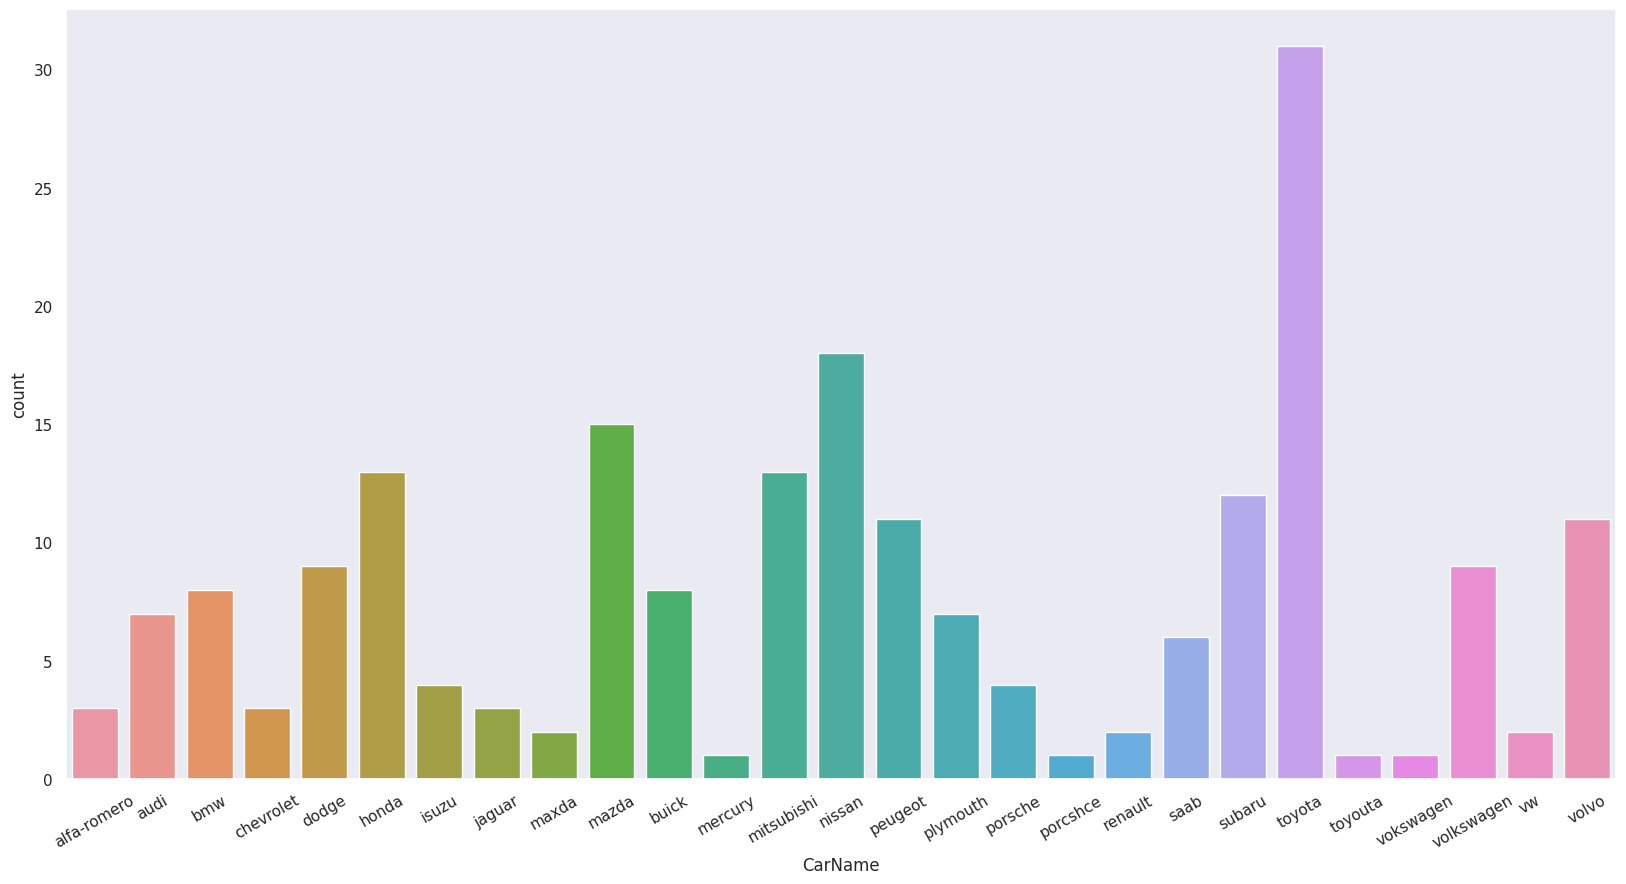

In [15]:
plt.figure(figsize = (20,10))
sns.countplot(df, x='CarName')
plt.xticks(rotation=30)

<Axes: xlabel='aspiration', ylabel='price'>

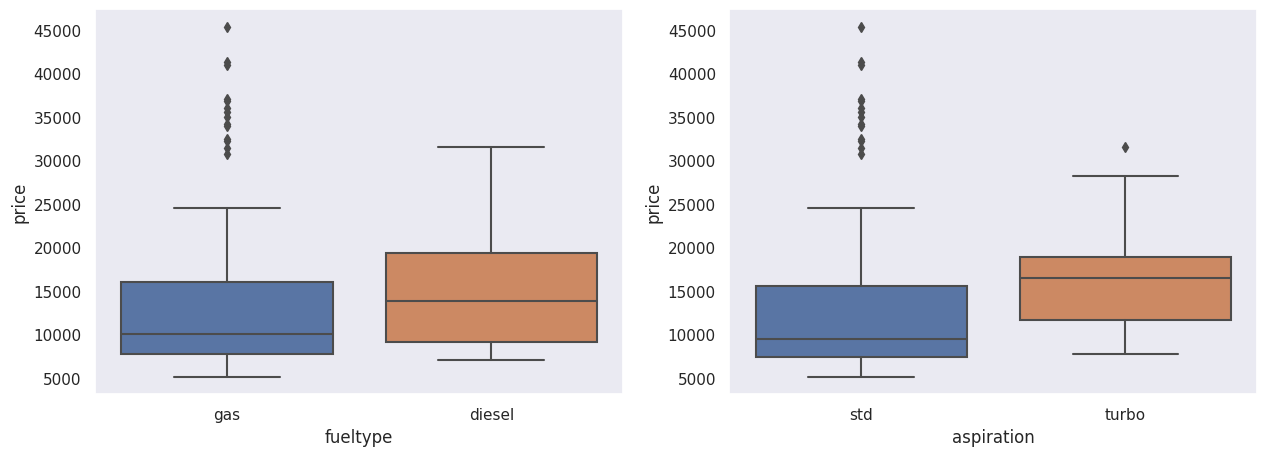

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(df,x='fueltype', y='price')
plt.subplot(122)
sns.boxplot(df,x='aspiration', y='price')

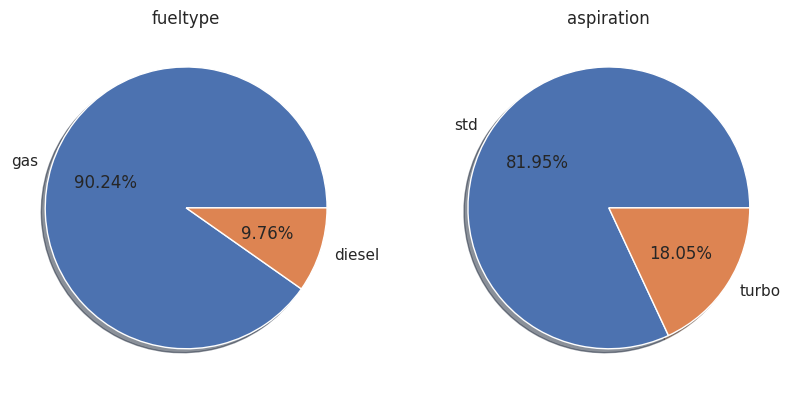

In [17]:
def pieplot(column_name):
    """
    column_name must be categorical with 2 or 3 cat
    """
    plt.pie(df[column_name].value_counts(), labels=df[column_name].value_counts().index, autopct="%1.2f%%", shadow=True)
    plt.title(f'{column_name}')
    
plt.figure(figsize=(10,5))
plt.subplot(121)
pieplot('fueltype')
plt.subplot(122)
pieplot('aspiration')

### Most fuel Type is gas than diesel.
### Most aspiration is turbo


<Axes: xlabel='doornumber', ylabel='price'>

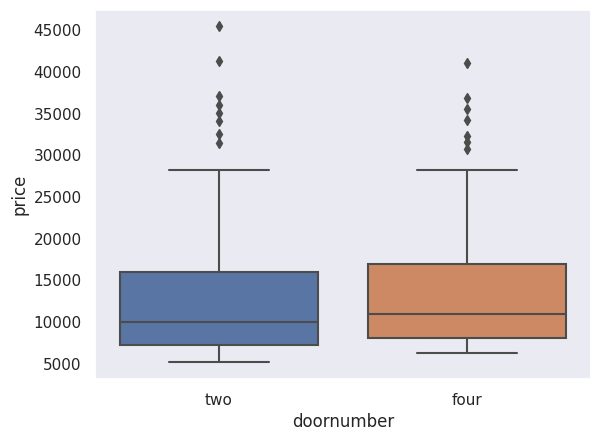

In [18]:
sns.boxplot(df,x='doornumber',y='price')

<Axes: xlabel='doornumber', ylabel='count'>

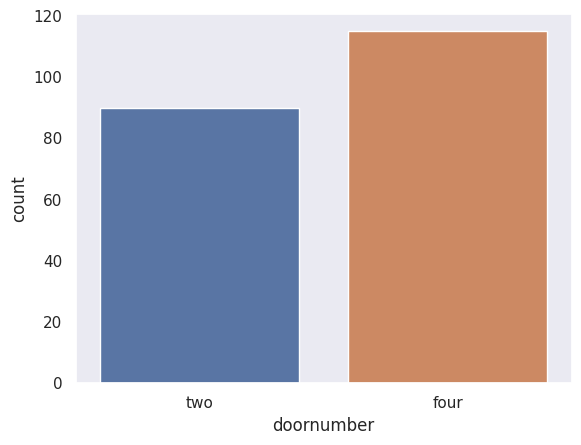

In [19]:
sns.countplot(df,x='doornumber')

<Axes: xlabel='carbody', ylabel='count'>

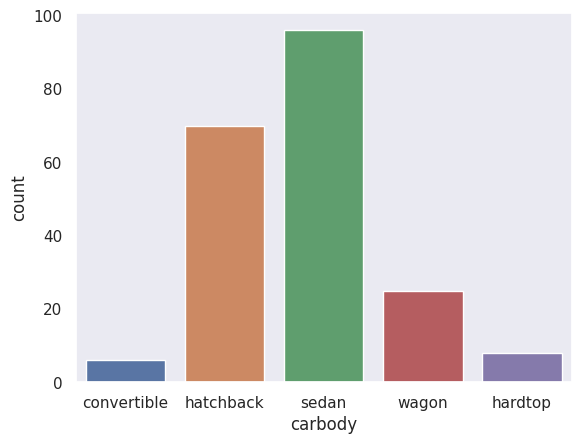

In [20]:
sns.countplot(df,x='carbody')

<Axes: xlabel='carbody', ylabel='price'>

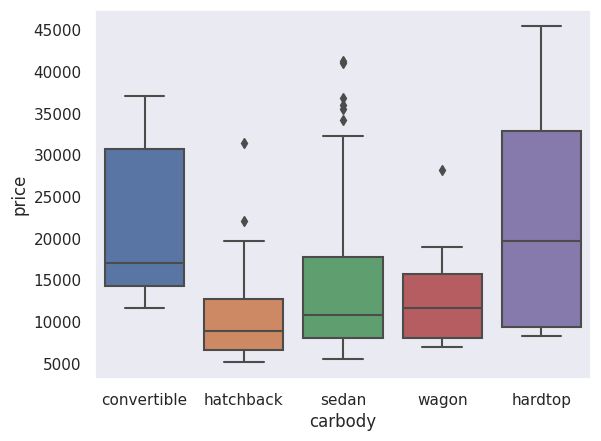

In [21]:
sns.boxplot(df,x='carbody', y='price')

<Axes: xlabel='drivewheel', ylabel='count'>

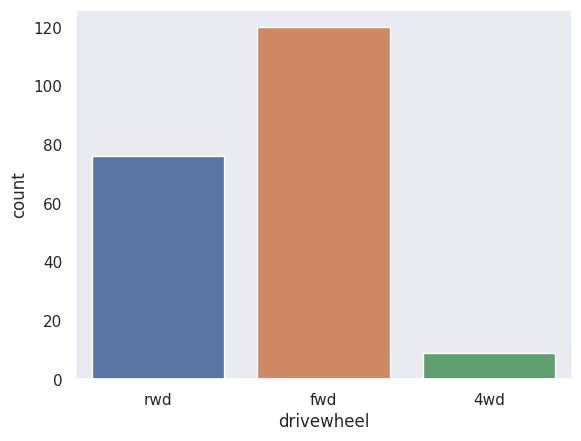

In [22]:
sns.countplot(df, x='drivewheel')

<Axes: xlabel='drivewheel', ylabel='price'>

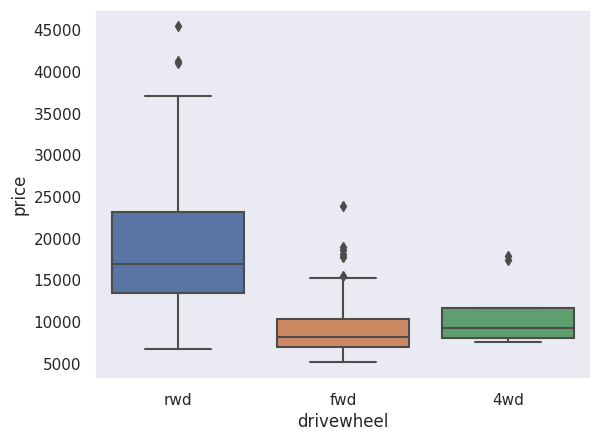

In [23]:
sns.boxplot(df, x='drivewheel', y='price')

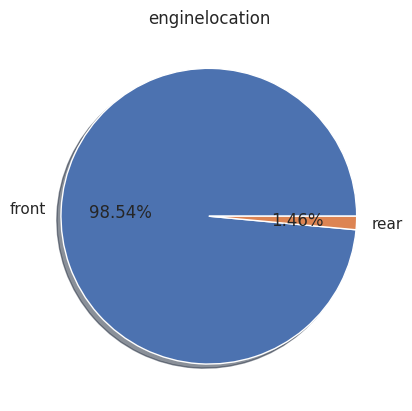

In [24]:
pieplot('enginelocation')

<Axes: xlabel='enginelocation', ylabel='price'>

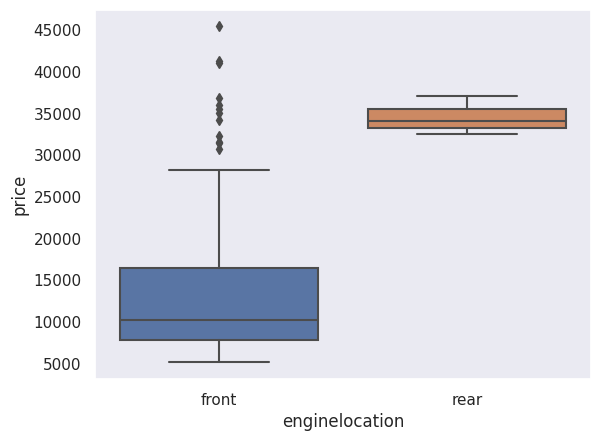

In [25]:
sns.boxplot(df, x = 'enginelocation', y = 'price')

### Most engineloation is rear

<Axes: xlabel='price', ylabel='carwidth'>

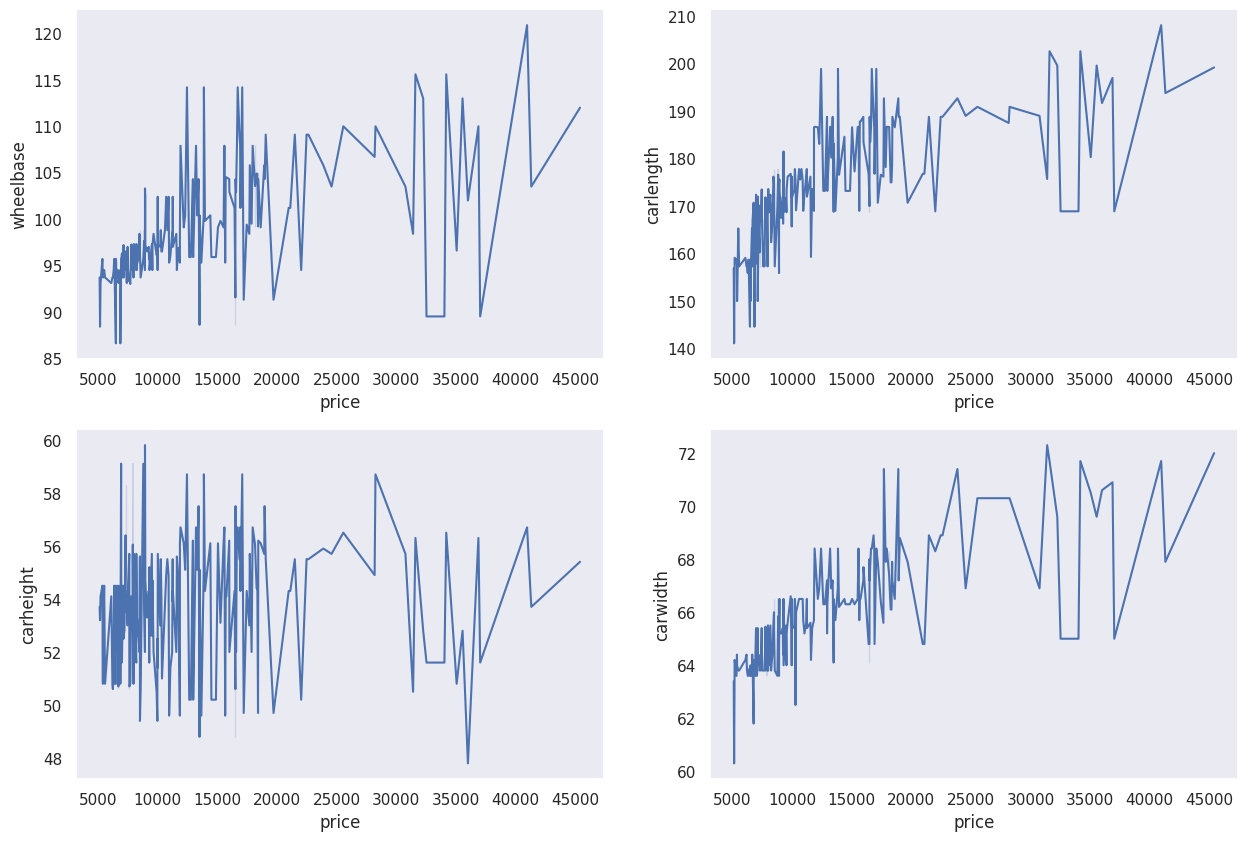

In [26]:
plt.figure(figsize = (15, 10))
plt.subplot(221)
sns.lineplot(df, x='price', y= 'wheelbase')
plt.subplot(222)
sns.lineplot(df, x= 'price', y = 'carlength')
plt.subplot(223)
sns.lineplot(df, x= 'price', y = 'carheight')
plt.subplot(224)
sns.lineplot(df, x='price', y='carwidth')


<Axes: xlabel='price', ylabel='curbweight'>

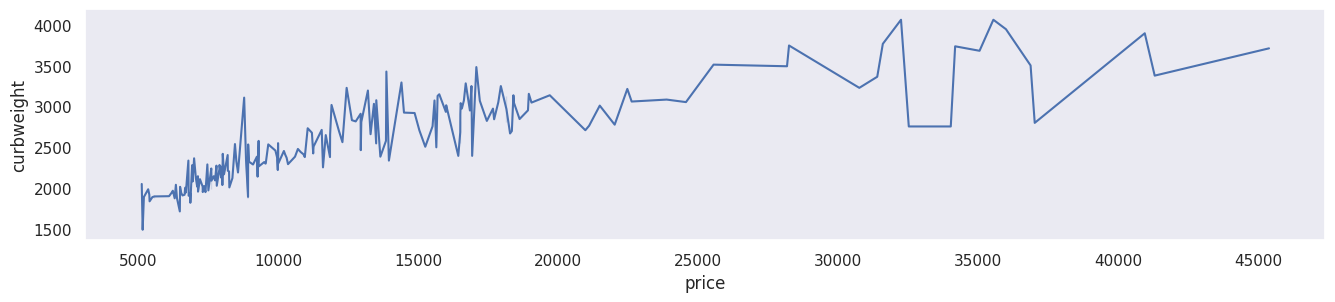

In [27]:
plt.figure(figsize=(16, 3))
sns.lineplot(df, x = 'price', y = 'curbweight')

<Axes: xlabel='enginetype', ylabel='count'>

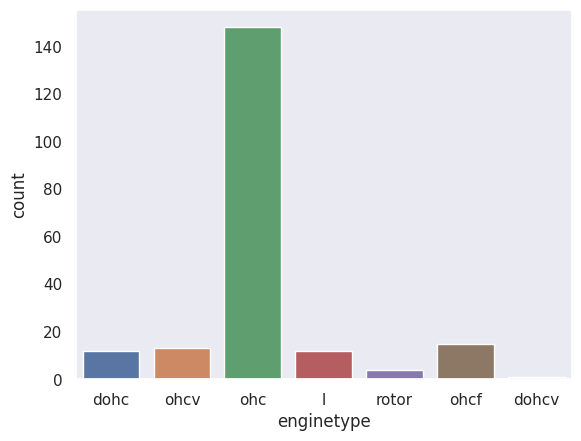

In [28]:
sns.countplot(df, x='enginetype')

<Axes: xlabel='enginetype', ylabel='price'>

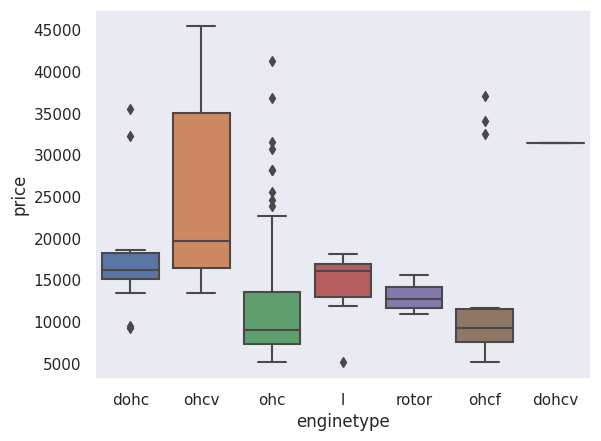

In [29]:
sns.boxplot(df, x = 'enginetype', y = 'price')

<Axes: xlabel='cylindernumber', ylabel='count'>

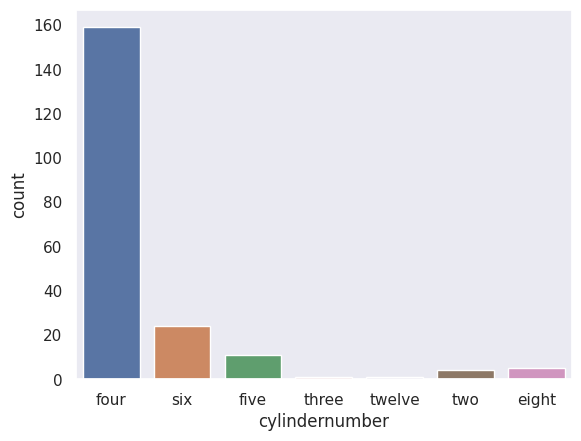

In [30]:
sns.countplot(df ,x='cylindernumber')

<Axes: xlabel='cylindernumber', ylabel='price'>

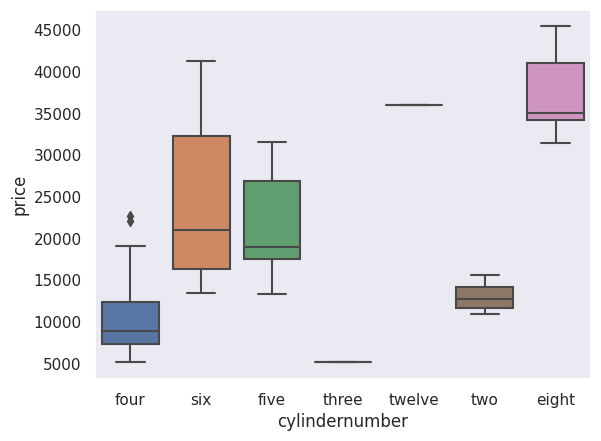

In [31]:
sns.boxplot(df, x= 'cylindernumber', y = 'price')

<Axes: xlabel='price', ylabel='enginesize'>

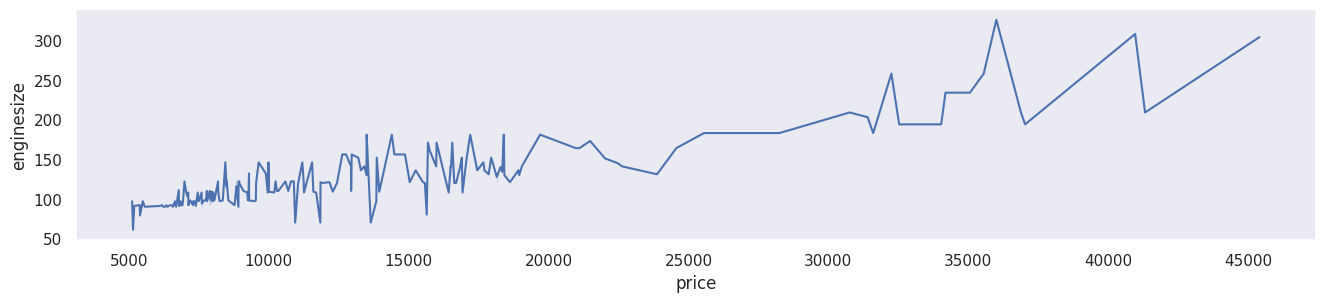

In [32]:
plt.figure(figsize=(16, 3))
sns.lineplot(df, x='price', y = 'enginesize')

<Axes: xlabel='enginesize', ylabel='Count'>

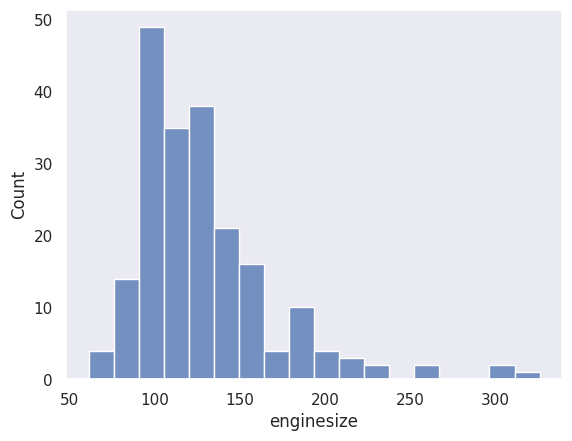

In [33]:
sns.histplot(df, x = 'enginesize')

<Axes: xlabel='fuelsystem', ylabel='count'>

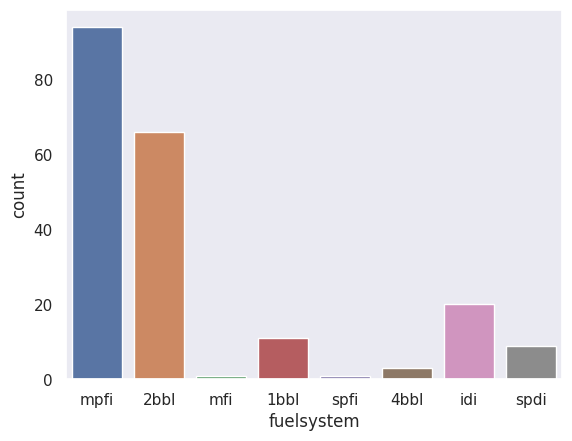

In [34]:
sns.countplot(df, x='fuelsystem')

<Axes: xlabel='fuelsystem', ylabel='price'>

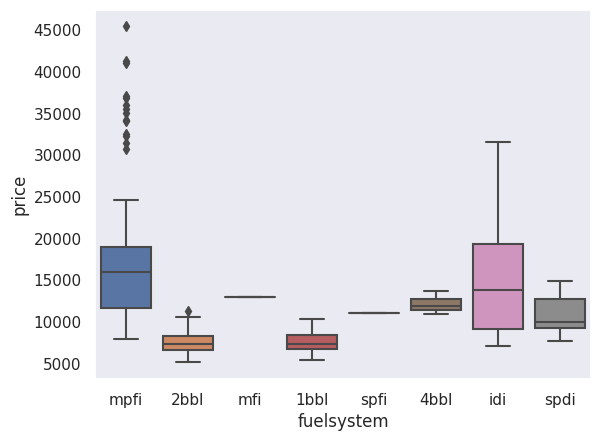

In [35]:
sns.boxplot(df, x= 'fuelsystem' , y = 'price')

<Axes: xlabel='boreratio', ylabel='price'>

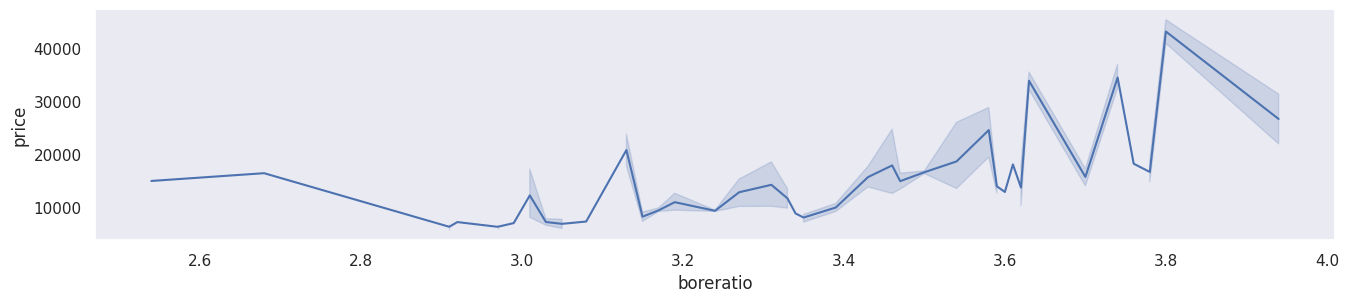

In [36]:
plt.figure(figsize=(16, 3))
sns.lineplot(df, x='boreratio', y = 'price')

<Axes: xlabel='boreratio', ylabel='Count'>

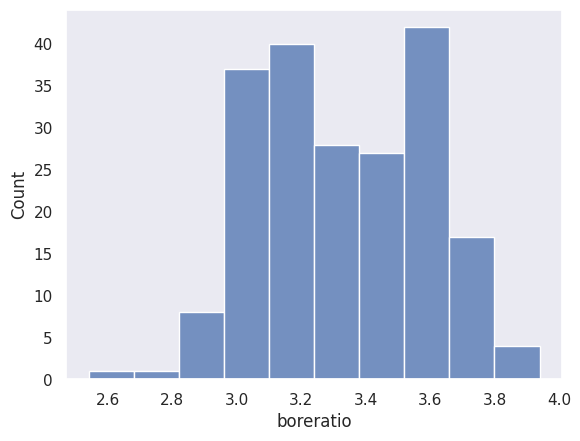

In [37]:
sns.histplot(df, x='boreratio')

<Axes: xlabel='stroke', ylabel='price'>

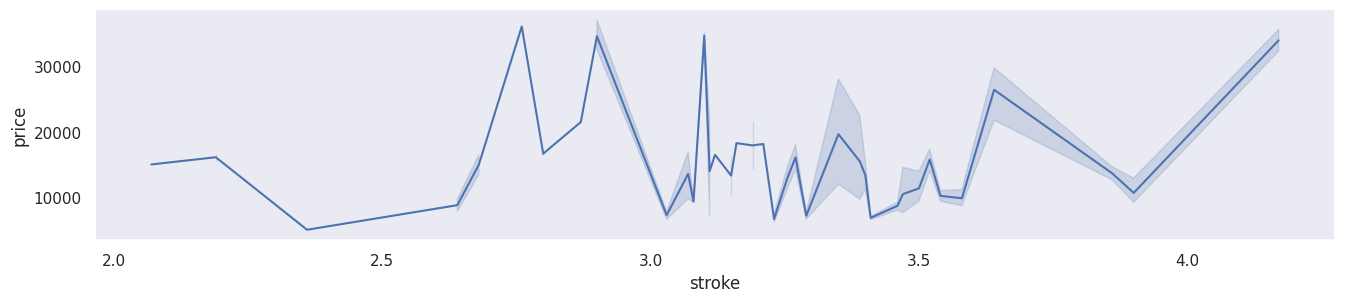

In [38]:
plt.figure(figsize=(16, 3))
sns.lineplot(df, x = 'stroke', y = 'price')

<Axes: xlabel='stroke', ylabel='Count'>

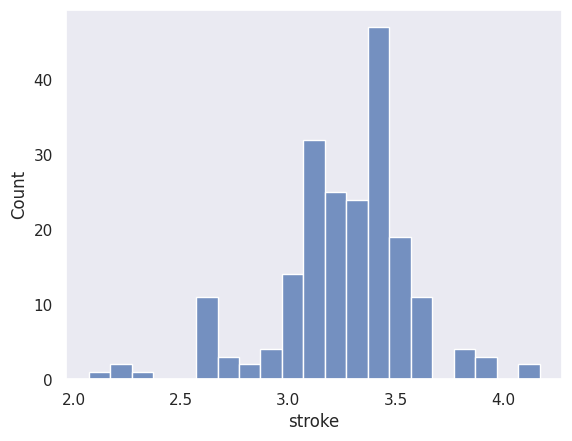

In [39]:
sns.histplot(df, x='stroke')

<Axes: xlabel='compressionratio', ylabel='price'>

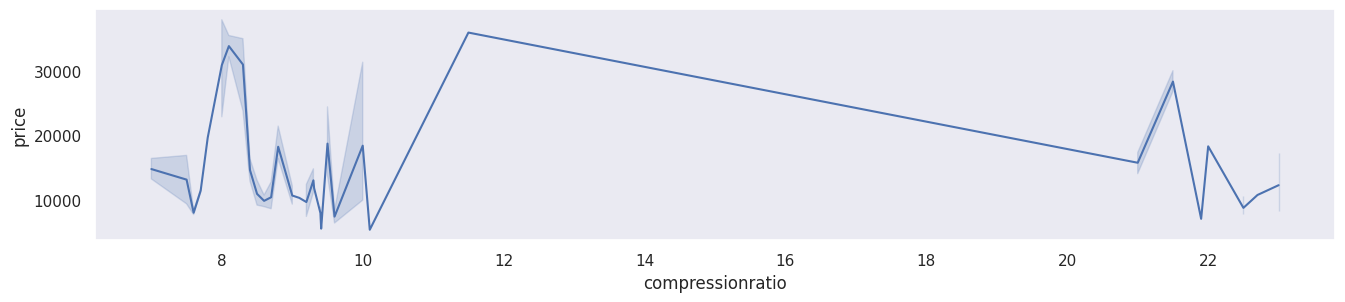

In [40]:
plt.figure(figsize=(16, 3))
sns.lineplot(df, x = 'compressionratio', y = 'price')

<Axes: xlabel='compressionratio', ylabel='Count'>

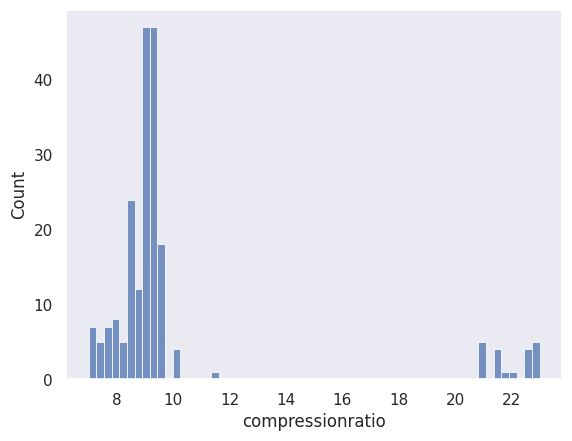

In [41]:
sns.histplot(df, x ='compressionratio')

<Axes: xlabel='price', ylabel='horsepower'>

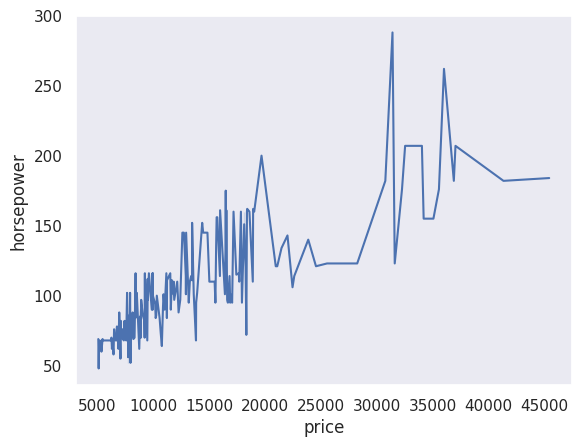

In [42]:
sns.lineplot(df, x = 'price', y = 'horsepower')

<Axes: xlabel='citympg', ylabel='price'>

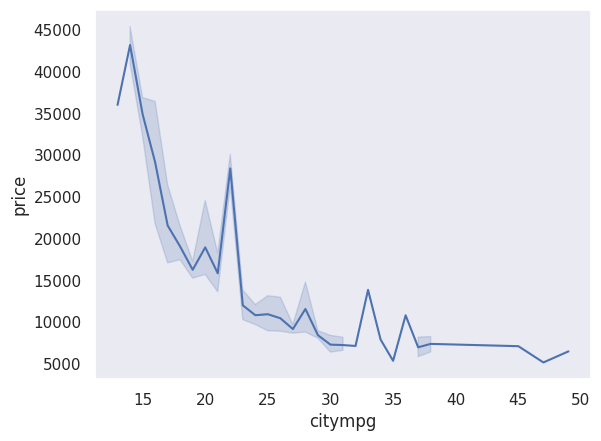

In [43]:
sns.lineplot(df, x = 'citympg',  y = 'price')

<Axes: xlabel='highwaympg', ylabel='price'>

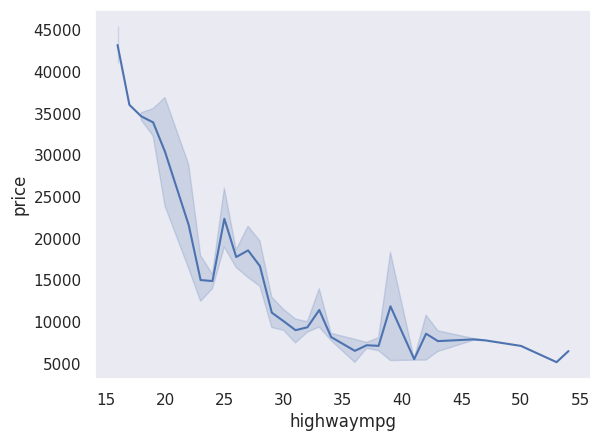

In [44]:
sns.lineplot(df, x='highwaympg', y = 'price')

In [45]:
X = df.drop(['price'], axis = 1)
y = df.price
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [46]:
X.drop(["doornumber", "fuelsystem", "compressionratio", "stroke", "symboling"], axis = 1, inplace=True)
X.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,111,5000,21,27
2,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,111,5000,21,27
3,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,154,5000,19,26
4,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,102,5500,24,30
5,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,115,5500,18,22


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in X.select_dtypes(include="object").columns.tolist():
    X[i] = le.fit_transform(X[i])
X.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,3.47,111,5000,21,27
2,0,1,0,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,3.47,111,5000,21,27
3,0,1,0,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,2.68,154,5000,19,26
4,1,1,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,3.19,102,5500,24,30
5,1,1,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,3.19,115,5500,18,22


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=.2, random_state=41)
X_train.shape, y_test.shape

((164, 19), (41,))

In [49]:
var_to_stand=["wheelbase", "carlength", "carwidth",
              "carheight", "curbweight", "enginesize",
              "boreratio", "horsepower","peakrpm", "citympg", "highwaympg"]

In [50]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train[var_to_stand] = ss.fit_transform(X_train[var_to_stand])
X_test[var_to_stand] = ss.transform(X_test[var_to_stand])


# LinearRegression

In [51]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)


In [52]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

r2_score(y_test, y_pred_lg), mean_squared_error(y_test, y_pred_lg)#6836960.042129421

(0.7815773003997153, 8392249.47141676)

<Axes: xlabel='price', ylabel='price'>

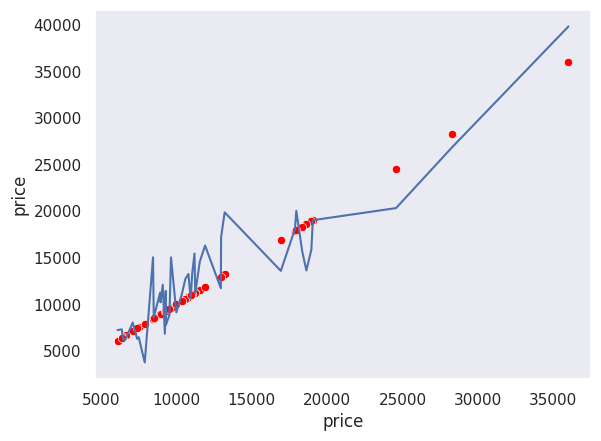

In [53]:
sns.scatterplot(x=y_test, y=y_test, c = 'red')
sns.lineplot(x=y_test,y=y_pred_lg )

# Ridge

In [54]:
from sklearn.linear_model import Ridge, Lasso
rg = Ridge()
rg.fit(X_train, y_train)
y_pred_rg = rg.predict(X_test)
r2_score(y_test, y_pred_rg), mean_squared_error(y_test, y_pred_rg)#6836960.042129421

(0.7758723088737853, 8611446.982506674)

<Axes: xlabel='price', ylabel='price'>

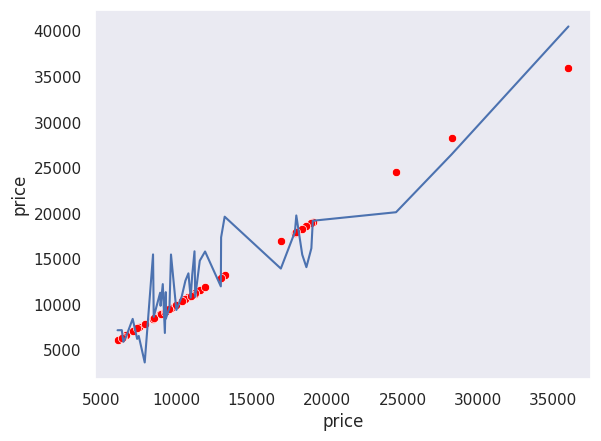

In [55]:
sns.scatterplot(x=y_test, y=y_test, c = 'red')
sns.lineplot(x=y_test,y=y_pred_rg )

# Lasso

In [56]:
lo = Lasso()
lo.fit(X_train, y_train)
y_pred_lo = lo.predict(X_test)
r2_score(y_test, y_pred_lo), mean_squared_error(y_test, y_pred_lo)#6836960.042129421

(0.7818380109272414, 8382232.4365992835)

<Axes: xlabel='price', ylabel='price'>

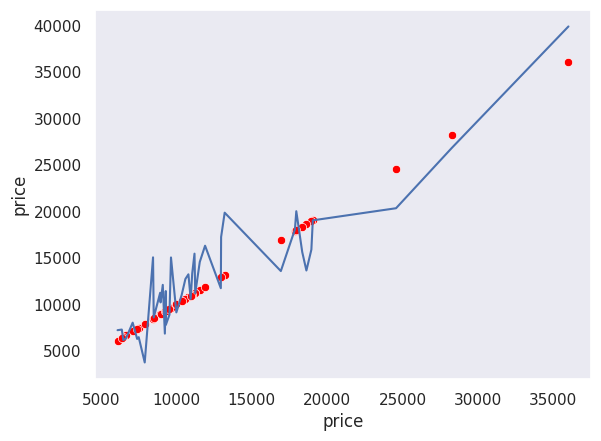

In [57]:
sns.scatterplot(x=y_test, y=y_test, c = 'red')
sns.lineplot(x=y_test,y=y_pred_lo )

# RandomForestRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
r2_score(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_rf)

(0.8840397567985414, 4455431.1044305535, 1582.860317073171)

<Axes: xlabel='price', ylabel='price'>

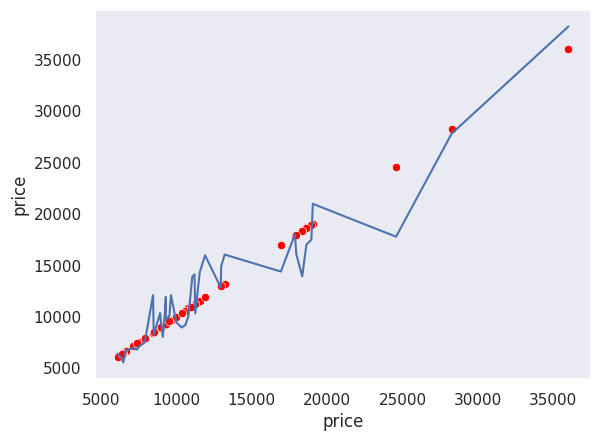

In [59]:
sns.scatterplot(x=y_test, y=y_test, c = 'red')
sns.lineplot(x=y_test,y=y_pred_rf)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'CarName'),
  Text(1, 0, 'fueltype'),
  Text(2, 0, 'aspiration'),
  Text(3, 0, 'carbody'),
  Text(4, 0, 'drivewheel'),
  Text(5, 0, 'enginelocation'),
  Text(6, 0, 'wheelbase'),
  Text(7, 0, 'carlength'),
  Text(8, 0, 'carwidth'),
  Text(9, 0, 'carheight'),
  Text(10, 0, 'curbweight'),
  Text(11, 0, 'enginetype'),
  Text(12, 0, 'cylindernumber'),
  Text(13, 0, 'enginesize'),
  Text(14, 0, 'boreratio'),
  Text(15, 0, 'horsepower'),
  Text(16, 0, 'peakrpm'),
  Text(17, 0, 'citympg'),
  Text(18, 0, 'highwaympg')])

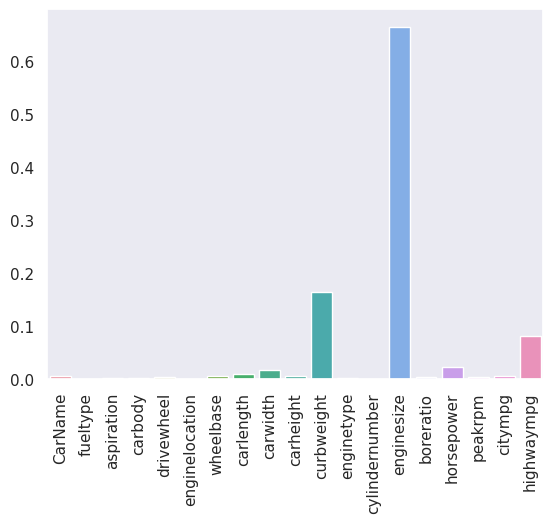

In [60]:
sns.barplot(x=X.columns, y = rf.feature_importances_)
plt.xticks(rotation=90)